<a href="https://colab.research.google.com/github/amunoz88/Applied_DS_2025/blob/main/Data_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance


In [ ]:
#@title Getting Yahoo finance data example
import yfinance
data = yfinance.download('^GSPC',period='1y')
data.columns = data.columns.droplevel(1)
print("\n")
print(data)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



Price             Close         High          Low         Open      Volume
Date                                                                      
2024-03-26  5203.580078  5235.160156  5203.419922  5228.850098  3871790000
2024-03-27  5248.490234  5249.259766  5213.919922  5226.310059  3850500000
2024-03-28  5254.350098  5264.850098  5245.819824  5248.029785  3998270000
2024-04-01  5243.770020  5263.950195  5229.200195  5257.970215  3325930000
2024-04-02  5205.810059  5208.339844  5184.049805  5204.290039  3886590000
...                 ...          ...          ...          ...         ...
2025-03-19  5675.290039  5715.330078  5622.200195  5632.370117  4660090000
2025-03-20  5662.890137  5711.149902  5632.330078  5646.919922  4678420000
2025-03-21  5667.560059  5670.839844  5603.100098  5630.729980  9367460000
2025-03-24  5767.569824  5775.140137  5718.080078  5718.080078  4517990000
2025-03-25  5776.649902  5786.950195  5760.419922  5775.959961  2675650000

[250 rows x 5 columns]

In [1]:
#@title Getting data from web API example
import requests
import json
import pandas as pd

# You should get your own API key at https://api.congress.gov/sign-up/
API_KEY=""
def get_members(congress_number, first_index, last_index):
  request = f"https://api.congress.gov/v3/member/congress/{congress_number}?api_key={API_KEY}&offset={first_index}&limit={last_index - first_index}"
  r = requests.get(request)
  return parse_dataset(json.loads(r.content))

def get_all_members(congress_number):
  """Returns all members of congress for a given congress number.

  Args: Congress number. There is a new congress every two years.

  Returns:
    A pandas DataFrame containing all members of congress and their affiliation as well as the chamber they belong to.
  """

  return pd.concat([get_members(congress_number, 200*i, 200*(i+1)) for i in range(3)]).reset_index(drop=True)

def parse_member(entry):
  name = entry['name']
  party = entry['partyName']
  terms = entry['terms']['item']
  chamber = terms[len(terms)-1]['chamber']
  return name, party, chamber

def parse_dataset(json_obj):
  name, party, chamber = zip(*[parse_member(entry) for entry in json_obj['members']])
  return pd.DataFrame({'name': name, 'party': party, 'chamber': chamber})

get_all_members(118)

KeyError: 'members'

In [ ]:
#@title Getting data using pandas_datareader
import pandas as pd
import pandas_datareader.data as web
import datetime

def get_us_gdp_growth(years=60):
    """
    Retrieves US GDP growth data from FRED (Federal Reserve Economic Data)
    for the specified number of years and returns it as a pandas DataFrame.

    Args:
        years (int): The number of years to retrieve data for.

    Returns:
        pandas.DataFrame: A DataFrame with the GDP growth data, or None if an error occurs.
    """
    try:
        end = datetime.datetime.now()
        start = end - datetime.timedelta(days=years * 365) #approximate

        # GDP growth (annual %) from FRED
        df = web.DataReader('A191RL1Q225SBEA', 'fred', start, end)

        # Convert to annual data
        df_annual = df.resample('Y').mean()

        # Rename the column
        df_annual.columns = ['GDP Growth (Annual %)']

        # Drop any potential future years if the data is updated frequently.
        df_annual = df_annual[df_annual.index.year <= end.year]

        return df_annual

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Get the GDP growth data for the past 60 years
gdp_growth_df = get_us_gdp_growth(60)

<ipython-input-1-8b03fc0552bd>:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = df.resample('Y').mean()


In [ ]:
start = datetime.datetime(1950, 1, 1)  # Example start date
end = datetime.datetime.now()

unemployment_data = web.DataReader('UNRATE', 'fred', start, end)

print(unemployment_data)

            UNRATE
DATE              
1950-01-01     6.5
1950-02-01     6.4
1950-03-01     6.3
1950-04-01     5.8
1950-05-01     5.5
...            ...
2024-10-01     4.1
2024-11-01     4.2
2024-12-01     4.1
2025-01-01     4.0
2025-02-01     4.1

[902 rows x 1 columns]


<Axes: xlabel='DATE', ylabel='UNRATE'>

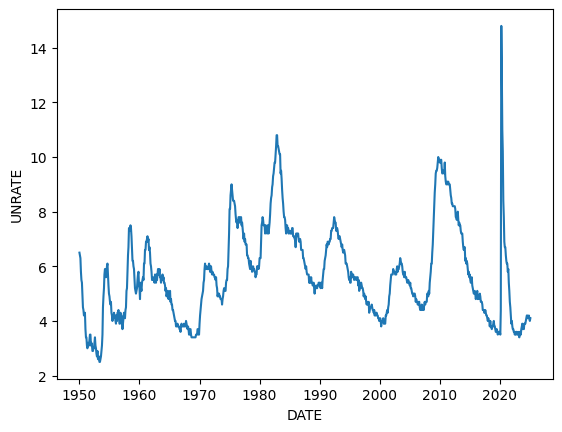

In [ ]:
import seaborn as sns
sns.lineplot(data=unemployment_data, x = 'DATE', y = 'UNRATE')